# Assignment 2: Exploring Tree-Based Regression Methods for 2D Linear Data
## DTSC 680: Applied Machine Learning

## Name: Betty Tai

## Directions and Overview

The main purpose of this assignment is for you to gain experience using tree-based methods to solve simple regression problems.  In this assignment, you will fit a `Gradient-Boosted Regresstion Tree`, a `Random Forest`, and a `Decision Tree` to a noisy 2D linear data set.  Since these models can be trained very quickly on the supplied data, I want you to first manually adjust hyperparameter values and observe their influence on the model's predictions.  That is, you should manually sweep the hyperparameter space and try to hone in on the optimal hyperparameter values, again, _manually_.  (Yep, that means guess-and-check: pick some values, train the model, observe the prediction curve, repeat.)

But wait, there's more! Merely attempting to identify the optimal hyperparameter values is not enough.  Be sure to really get a visceral understanding of how altering a hyperparameter in turn alters the model predictions (i.e. the prediction curve).  This is how you will build your machine learning intuition!

So, play around and build some models.  When you are done playing with hyperparameter values, you should try to set these values to the optimal values manually (you're likely going to be _way_ off).  Then, retrain the model.  Next in this assignment, we will perform several grid searches, so you'll be able to compare your "optimal" hyperparameter values with those computed from the grid search.

We will visualize model predictions for the optimal `Gradient-Boosted Regresstion Tree`, a `Random Forest`, and `Decision Tree` models that were determined by the grid searches.  Next, you will compute the generalization error on the test set for the three models.

You will think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results.  Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results?

Lastly, based on the arguments outlined in your critical analysis you must identify the model that best characterizes this data.  In other words, which of these models is going to generalize better? Consider all factors.

## Preliminaries

Let's import some common packages:

In [ ]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
    
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

# Import and Split Data

Complete the following:



1. Begin by importing the data from the file called `2DLinear.csv`.  Name the returned DataFrame `data`. 

2. Call [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a `test_size` of 20%.  Save the output into `X_train`, `X_test`, `y_train`, and `y_test`, respectively.  Specify the `random_state` parameter to be `42` (do this throughout the entire note book).
3. Reshape some data, so that we don't run into trouble later.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('2DLinear.csv')
X = data['x'].to_numpy().reshape(125,1)
y = data['y'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Reshape X Data and Make NumPy Arrays
X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_train = np.array(y_train)
y_test = np.array(y_test)



# Plot Data

Simply plot your training data here in order to create the plot below.

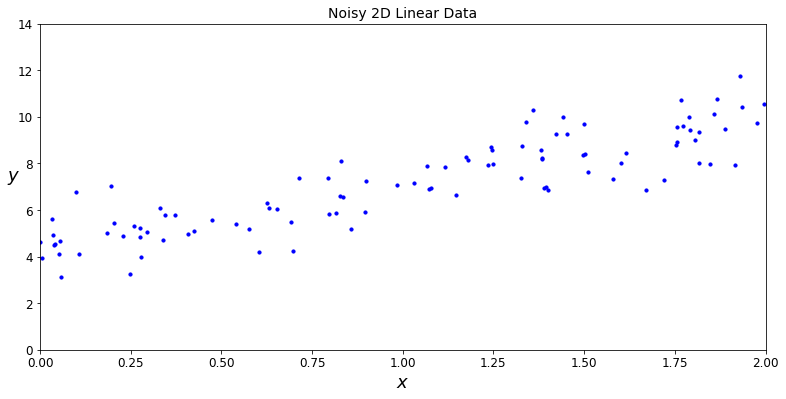

Saving figure Raw2DLinearData


<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13,6))
plt.scatter(X_train, y_train, s=10, c='#0000ff')
axes=[0, 2, 0, 14]
plt.axis(axes)
plt.title("Noisy 2D Linear Data", fontsize=14)
plt.xlabel(r"$x$", fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
plt.show()
save_fig("Raw2DLinearData")

# Explore 2D Linear Data: GradientBoostingRegressor

Fit a `GradientBoostingRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `learning_rate = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1, random_state=42)


gbrt.fit(X_train, y_train)

gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=50, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=50, random_state=42)

### Plot Model Predictions for Training Set

Saving figure gbrt_2DLinearReg


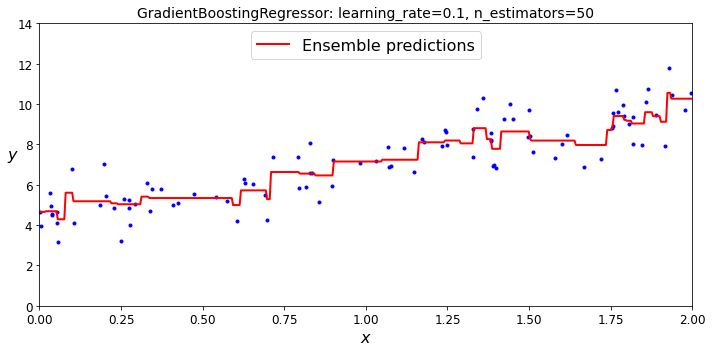

In [ ]:
plt.figure(figsize=(10,5))

plot_predictions([gbrt_slow], X_train, y_train, axes=[0, 2.00, 0, 14], label="Ensemble predictions")
plt.title("GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gbrt_2DLinearReg")
plt.show()

# Explore 2D Linear Data: RandomForestRegressor

Fit a `RandomForestRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `min_samples_split = <value>`
 - `max_depth = <value>`
 - `n_estimators = <value>`
 - `random_state = 42`

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

rnd_clf = RandomForestRegressor(min_samples_split=20, n_estimators=100, max_leaf_nodes=32, random_state=42)

rnd_clf.fit(X_train, y_train)

#print(rnd_clf.__class__.__name__, rnd_clf.score(X_test, y_test))

RandomForestRegressor(max_leaf_nodes=32, min_samples_split=20, random_state=42)

### Plot Model Predictions for Training Set

Saving figure rf_2DLinearReg


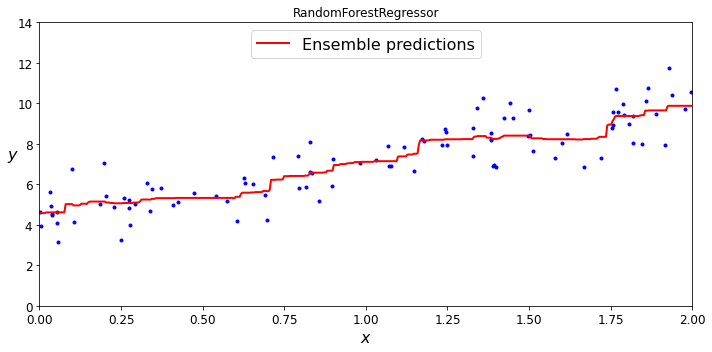

In [ ]:
plt.figure(figsize=(10,5))
plot_predictions([rnd_clf], X_train, y_train, axes=[0, 2.00, 0, 14], label="Ensemble predictions")
plt.title("RandomForestRegressor", fontsize=12)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("rf_2DLinearReg")
plt.show()

# Explore 2D Linear Data: DecisionTreeRegressor

Fit a `DecisionTreeRegressor` model to this data.  You must manually assign values to the following hyperparameters.  You should "play around" by using different combinations of hyperparameter values to really get a feel for how they affect the model's predictions.  When you are done playing, set these to the best values you can for submission.  (It is totally fine if you don't elucidate the optimal values here; however, you will want to make sure your model is not excessively overfitting or underfitting the data.  Do this by examining the prediction curve generated by your model.  You will be graded, more exactly, on the values that you calculate later from performing several rounds of grid searches.)

 - `splitter = <value>`
 - `max_depth = <value>`
 - `min_samples_split = <value>`
 - `random_state = 42`

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr_clf = DecisionTreeRegressor(splitter='best', max_depth=100, min_samples_split=32, random_state=42)
dtr_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=100, min_samples_split=32, random_state=42)

### Plot Model Predictions for Training Set

DecisionTreeRegressor
Saving figure dt_2DLinearReg


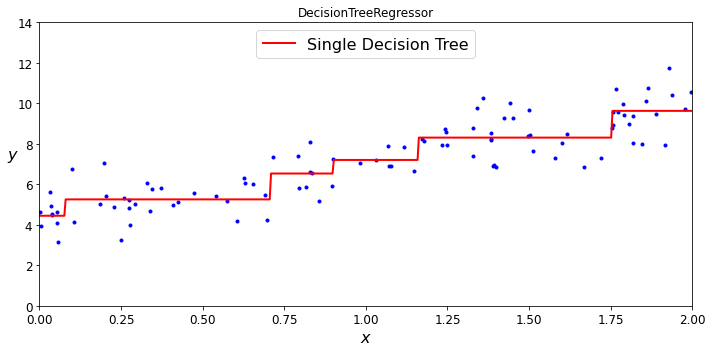

In [ ]:
print(dtr_clf.__class__.__name__)
plt.figure(figsize=(10,5))
plot_predictions([dtr_clf], X_train, y_train, axes=[0, 2.00, 0, 14], label="Single Decision Tree")
plt.title("DecisionTreeRegressor", fontsize=12)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("dt_2DLinearReg")
plt.show()

# Perform Grid Searches

You will perform a series of grid searches, which will yield the optimal hyperparamter values for each of the three model types.  You can compare the values computed by the grid search with the values you manually found earlier.  How do these compare?

You must perform a course-grained grid search, with a very broad range of values first.  Then, you perform a second grid search using a tighter range of values centered on those identified in the first grid search.  You may have to use another round of grid searching too (it took me at least three rounds of grid searches per model to ascertain the optimal hyperparameter values below).

Note the following:

1. Be sure to clearly report the optimal hyperparameters in the designated location after you calculate them!

2. You must use `random_state=42` everywhere that it is needed in this notebook.

3. You must use grid search to compute the following hyperparameters. Use the following hyperparameter values as the bounds of the ranges to be probed in your initial stint of grid searching.  Pause and take note of these values.  You should examine these hyperparameters and their associated ranges, learn from this example, and use these values as a basis for your own future work when performing grid searches.  This is how you will build your machine learning intuition.  Keep in mind, these values also depend somewhat on this specific dataset!  (For example, it is important to notice that I decided to probe up to 1,000 for n_estimators.  10 would have been far too small.  1,000,000 would have been far too large.)

   GradientBoostingRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `learning_rate = from .01 to 1`

   RandomForestRegressor:
    
     - `max_depth = up to 32`
     - `n_estimators = up to 1000`
     - `min_samples_split = up to 20`

   DecisionTreeRegressor:
    
     - `splitter = ["best", "random"]`
     - `max_depth = up to 32`
     - `min_samples_split = up to 20`
     
     
4. All real-valued hyperparameters must be rounded to two significant digits.


## Perform Individual Model Grid Searches

In this section you will perform a series of grid searches to compute the optimal hyperparameter values for each of the three model types.

In [ ]:
np.linspace(0.25,.30,11)

array([0.25 , 0.255, 0.26 , 0.265, 0.27 , 0.275, 0.28 , 0.285, 0.29 ,
       0.295, 0.3  ])

In [ ]:
# -----
# Coarse-Grained GradientBoostingRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

params = {'max_depth': np.arange(2,32,2), 'n_estimators': np.arange(25,1025, 25), 'learning_rate': np.linspace(0.01,1,5)}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 3000 candidates, totalling 9000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'learning_rate': 0.2575, 'max_depth': 2, 'n_estimators': 25}


[Parallel(n_jobs=1)]: Done 9000 out of 9000 | elapsed:  7.5min finished


In [ ]:
# -----
# Refined GradientBoostingRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

params = {'max_depth': np.arange(1,6), 'n_estimators': np.arange(20,30), 'learning_rate': np.linspace(0.2,.3,9)}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 450 candidates, totalling 1350 fits
The best parameters are:  {'learning_rate': 0.2875, 'max_depth': 2, 'n_estimators': 21}


[Parallel(n_jobs=1)]: Done 1350 out of 1350 | elapsed:    4.5s finished


In [ ]:
# -----
# Final GradientBoostingRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

params = {'max_depth': np.arange(1,6), 'n_estimators': np.arange(20,30), 'learning_rate': np.linspace(0.25,.30,11)}
grid_search_cv = GridSearchCV(GradientBoostingRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 550 candidates, totalling 1650 fits
The best parameters are:  {'learning_rate': 0.295, 'max_depth': 2, 'n_estimators': 24}


[Parallel(n_jobs=1)]: Done 1650 out of 1650 | elapsed:    5.9s finished


On this dataset, the optimal model parameters for the `GradientBoostingRegressor` class are:

- `learning_rate = 0.295`
- `max_depth = 2`
- `n_estimators = 24`

In [ ]:
np.linspace(1,1000, 10)

array([   1.,  112.,  223.,  334.,  445.,  556.,  667.,  778.,  889.,
       1000.])

In [ ]:
# -----
# Coarse-Grained RandomForestRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

params = {'max_depth': np.arange(2,32,4), 'n_estimators': np.arange(1,1200,100), 'min_samples_split': np.arange(2,20,2)}
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 864 candidates, totalling 2592 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 6, 'n_estimators': 101}


[Parallel(n_jobs=1)]: Done 2592 out of 2592 | elapsed: 14.9min finished


In [ ]:
# -----
# Refined RandomForestRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

params = {'max_depth': np.arange(2,32,2), 'n_estimators': np.arange(25,1100, 25), 'min_samples_split': np.linspace(0.1,1,10)}
grid_search_cv = GridSearchCV(RandomForestRegressor(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6450 candidates, totalling 19350 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 0.1, 'n_estimators': 100}


[Parallel(n_jobs=1)]: Done 19350 out of 19350 | elapsed: 160.6min finished


On this dataset, the optimal model parameters for the `RandomForestRegressor` class are:

- `max_depth = <value>`
- `n_estimators = <value>`
- `min_samples_split = <value>`

In [ ]:
# -----
# Coarse-Grained DecisionTreeRegressor GridSearch
# -----

from sklearn.model_selection import GridSearchCV

dtr_params = {'splitter': ["best","random"], 'max_depth': np.arange(2,34,2), 'min_samples_split': np.arange(2,24,2)}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), dtr_params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)

Fitting 3 folds for each of 352 candidates, totalling 1056 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


The best parameters are:  {'max_depth': 6, 'min_samples_split': 4, 'splitter': 'random'}


[Parallel(n_jobs=1)]: Done 1056 out of 1056 | elapsed:    0.7s finished


In [ ]:
np.arange(1,23,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [ ]:
# -----
# Refined DecisionTreeRegressor GridSearch
# -----

dtr_params = {'splitter': ["random"], 'max_depth': np.arange(4,8), 'min_samples_split': np.arange(2,6)}
grid_search_cv = GridSearchCV(DecisionTreeRegressor(random_state=42), dtr_params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

print("The best parameters are: ", grid_search_cv.best_params_)
dtr_best_params = grid_search_cv.best_params_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
The best parameters are:  {'max_depth': 6, 'min_samples_split': 4, 'splitter': 'random'}


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.0s finished


On this dataset, the optimal model parameters for the `DecisionTreeRegressor` class are:

- `splitter = random`
- `max_depth = 6`
- `min_samples_split = 4`

# Visualize Optimal Model Predictions

In the previous section you performed a series of grid searches designed to identify the optimal hyperparameter values for all three models.  Now, use the `best_params_` attribute of the grid search objects from above to create the three optimal models below.  For each model, visualize the models predictions on the training set - this is what we mean by the "prediction curve" of the model.  

### Create Optimal GradientBoostingRegressor Model

In [ ]:
params = {'learning_rate': 0.295, 'max_depth': 2, 'n_estimators': 24}
gbr = GradientBoostingRegressor(**params, random_state=42)
gbr.fit(X_train, y_train)
print("For ", gbr.__class__.__name__, "the best parameters are: ", params)

For  GradientBoostingRegressor the best parameters are:  {'learning_rate': 0.295, 'max_depth': 2, 'n_estimators': 24}


### Plot Model Predictions for Training Set

Saving figure GradientBoostingRegressor


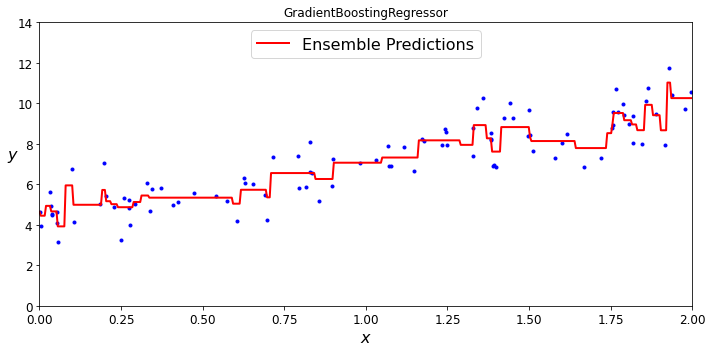

In [ ]:
plt.figure(figsize=(10,5))
plot_predictions([gbr], X_train, y_train, axes=[0, 2.00, 0, 14], label="Ensemble Predictions")
plt.title(gbr.__class__.__name__, fontsize=12)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
save_fig(gbr.__class__.__name__)
plt.show()

### Create Optimal RandomForestRegressor Model

In [ ]:
params = {'max_depth': 6, 'min_samples_split': 0.1, 'n_estimators': 100}
rbr = RandomForestRegressor(**params, random_state=42)
rbr.fit(X_train, y_train)
print("For ", rbr.__class__.__name__, "the best parameters are: ", params)

For  RandomForestRegressor the best parameters are:  {'max_depth': 6, 'min_samples_split': 0.1, 'n_estimators': 100}


### Plot Model Predictions for Training Set

Saving figure RandomForestRegressor


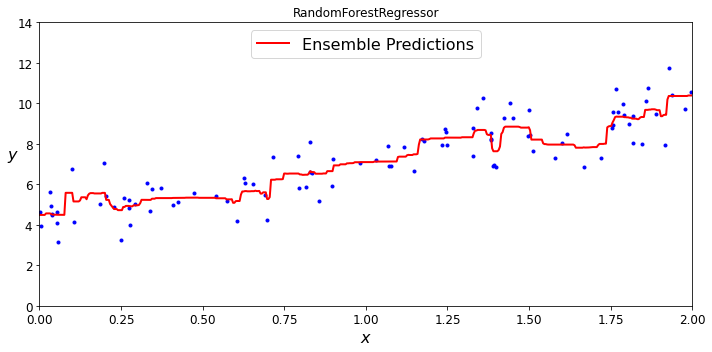

In [ ]:
plt.figure(figsize=(10,5))
plot_predictions([rbr], X_train, y_train, axes=[0, 2.00, 0, 14], label="Ensemble Predictions")
plt.title(rbr.__class__.__name__, fontsize=12)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
save_fig(rbr.__class__.__name__)
plt.show()

### Create Optimal DecisionTreeRegressor Model

In [ ]:
dtr = DecisionTreeRegressor(**dtr_best_params, random_state=42)
dtr.fit(X_train, y_train)
print("For ", dtr.__class__.__name__, "the best parameters are: ", dtr_best_params)

For  DecisionTreeRegressor the best parameters are:  {'max_depth': 6, 'min_samples_split': 4, 'splitter': 'random'}


### Plot Model Predictions for Training Set

Saving figure DecisionTreeRegressor


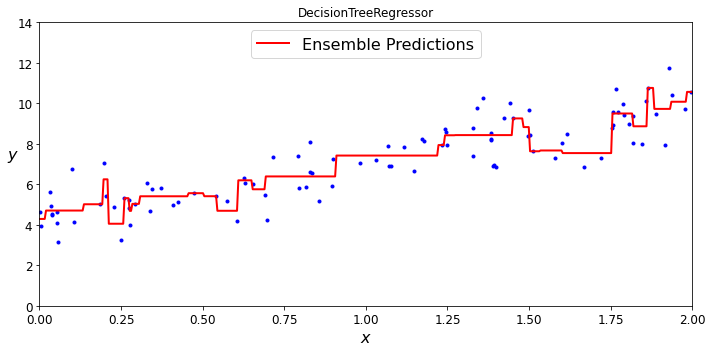

In [ ]:
plt.figure(figsize=(10,5))
plot_predictions([dtr], X_train, y_train, axes=[0, 2.00, 0, 14], label="Ensemble Predictions")
plt.title(dtr.__class__.__name__, fontsize=12)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)
save_fig(dtr.__class__.__name__)
plt.show()

# Compute Generalization Error

Compute the generalization error for each of the optimal models computed above.  Use MSE as the generalization error metric.  Round your answers to four significant digits.  Print the generalization error for all three models.

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

y_pred_gbr = gbr.predict(X_test)
y_pred_rbr = rbr.predict(X_test)
y_pred_dtr = dtr.predict(X_test)

print(gbr.__class__.__name__, "mean_square_error is: ", round(mean_squared_error(y_test, y_pred_gbr),3))
print(rbr.__class__.__name__, "mean_square_error is: ", round(mean_squared_error(y_test, y_pred_rbr),3))
print(dtr.__class__.__name__, "mean_square_error is: ", round(mean_squared_error(y_test, y_pred_dtr),3))

GradientBoostingRegressor mean_square_error is:  1.364
RandomForestRegressor mean_square_error is:  1.346
DecisionTreeRegressor mean_square_error is:  1.317


# Critical Analysis

Think critically about the different algorithms, as well as their prediction results, and characterize the trends you observe in the prediction results. Can you explain in your own words how the algorithms work? How do the results predicted by these models compare and contrast?  Can you see any relationship between the algorithms and the model results? Can you see any relationship between the prediction curves and the generalization error?

I am looking for meaningful content here.  Do not copy-and-paste model definitions off of the Internet.  You should think and write critically.


- Can you explain in your own words how the algorithms work? 
**Answer**
<br> Algorithms are a series of logical choices in order to measure something and come to a certain conclusion.


- How do the results predicted by these models compare and contrast? 
**Answer**
With Mean Squared Error (MSE), the model that has the lowest MSE is the DecisionTreeRegressor. The closer to 0 the MSE, the better the fit of the line. 

- Can you see any relationship between the algorithms and the model results? 
**Answer**
DecisionTreeRegressor uses many if/else statements and its prediction is hypertuned based on the depth of the trees. 
RandomForestRegressor is the averaging of decision trees and reduces overfitting because it averages the trees; the prediction comes from the average of trees in the forest. 


- Can you see any relationship between the prediction curves and the generalization error?

**Answer**
When the prediction curve is not as close to the model and overfits and doesn't seem to flexible to the scattter points, the generalizatoin error seems to be higher and correlated with the prediction curve fit. 




# Final Model Selection and Justification

Based on the arguments outlined in your critical analysis, make one final model recommendation.  Which model best characterizes this data?  In other words, which of these models is going to generalize better? Consider all factors.  What is the type of the optimal model (i.e. `GradientBoostingRegressor`, `RandomForestRegressor`, or `DecisionTreeRegressor`)? What are the optimal model hyperparameters that should be used for training on this data set?    Succinctly summarize the justification for your choice based on your arguments made above in the critical analysis section.


It seems like the decision tree regressor is the best model because it has the best MSE ie the lowest MSE. 
The best parameter models are summarized thusly: 
{'max_depth': 6, 'min_samples_split': 4, 'splitter': 'random'}. 
Since the training set seems closely related to the test set, the DecisionTreeRegressor is a good fit for the noisy data. 


